# Models Comparison (từ training_log.csv)

Notebook này đọc kết quả training đã có từ `training_log.csv` (từ `train_titanic.ipynb`) để so sánh các mô hình mà không cần tính toán lại. Hiển thị bảng metrics và các biểu đồ so sánh.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load training log
log_path = "training_log.csv"
results_df = pd.read_csv(log_path)
print("Training results loaded:")
print(results_df.to_string())


Training results loaded:
                    timestamp  seed   model  accuracy        f1   roc_auc  runtime_s              artifact
0  2025-10-27T09:41:45.336004    42  logreg  0.815642  0.751880  0.874572      0.009  models\logreg.joblib
1  2025-10-27T09:41:45.354798    42      rf  0.798883  0.727273  0.816996      0.010      models\rf.joblib
2  2025-10-27T09:41:45.434350    42      gb  0.810056  0.725806  0.852767      0.072      models\gb.joblib
3  2025-10-27T09:41:45.484308    42     svc  0.837989  0.781955  0.846640      0.040     models\svc.joblib


In [2]:
# Summary table: sort by F1 (chỉ số chính)
summary = (
    results_df[["model", "accuracy", "f1", "roc_auc", "runtime_s"]]
    .sort_values("f1", ascending=False)
    .reset_index(drop=True)
)
summary.index = summary.index + 1
summary.index.name = "rank"
print("\n=== Model Ranking by F1 ===")
print(summary.to_string())
print(f"\nBest model: {summary.iloc[0]['model']} (F1={summary.iloc[0]['f1']:.4f})")



=== Model Ranking by F1 ===
       model  accuracy        f1   roc_auc  runtime_s
rank                                                 
1        svc  0.837989  0.781955  0.846640      0.040
2     logreg  0.815642  0.751880  0.874572      0.009
3         rf  0.798883  0.727273  0.816996      0.010
4         gb  0.810056  0.725806  0.852767      0.072

Best model: svc (F1=0.7820)


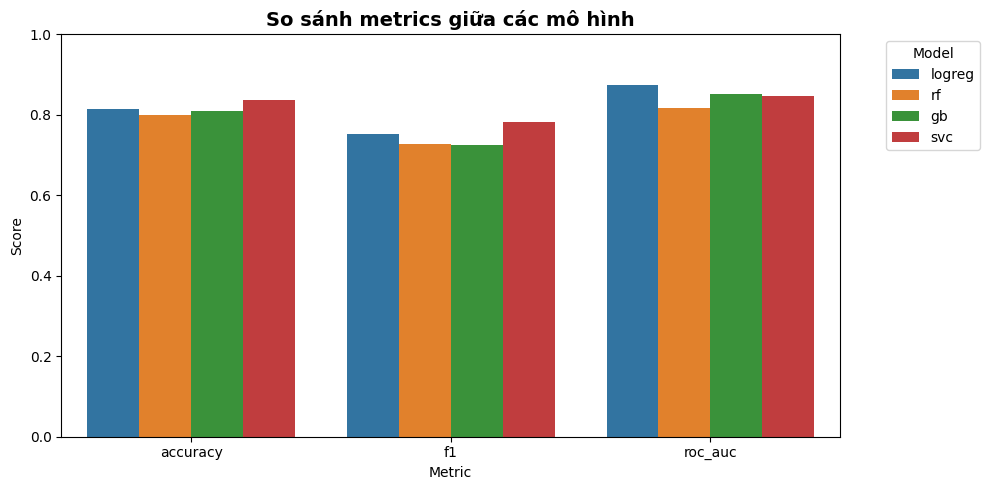

In [3]:
# Plot 1: Bar chart so sánh 3 metrics chính (accuracy, F1, ROC-AUC)
fig, ax = plt.subplots(figsize=(10, 5))
metrics = ["accuracy", "f1", "roc_auc"]
results_long = results_df.melt(
    id_vars=["model"], value_vars=metrics, var_name="metric", value_name="score"
)
sns.barplot(data=results_long, x="metric", y="score", hue="model", ax=ax)
ax.set_title("So sánh metrics giữa các mô hình", fontsize=14, fontweight="bold")
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_xlabel("Metric")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


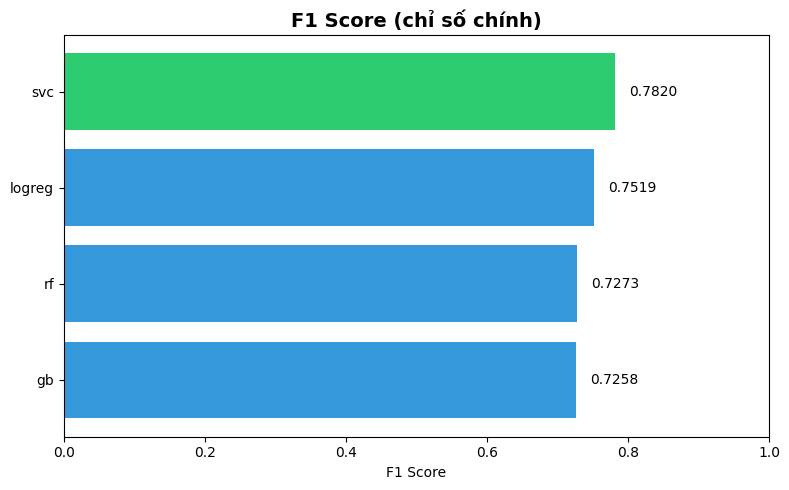

In [4]:
# Plot 2: F1 score comparison (chỉ số chính)
fig, ax = plt.subplots(figsize=(8, 5))
results_sorted = results_df.sort_values("f1", ascending=True)
colors = [
    "#2ecc71" if v == results_df["f1"].max() else "#3498db"
    for v in results_sorted["f1"]
]
ax.barh(results_sorted["model"], results_sorted["f1"], color=colors)
ax.set_title("F1 Score (chỉ số chính)", fontsize=14, fontweight="bold")
ax.set_xlabel("F1 Score")
ax.set_xlim(0, 1)
for i, v in enumerate(results_sorted["f1"]):
    ax.text(v + 0.02, i, f"{v:.4f}", va="center")
plt.tight_layout()
plt.show()


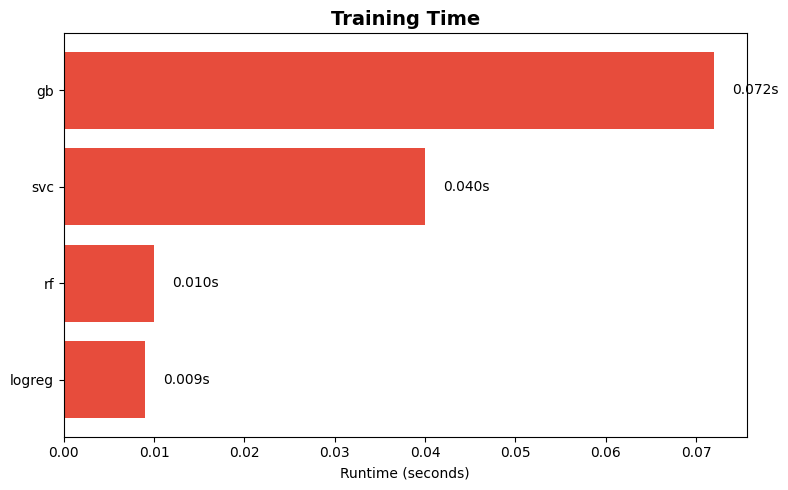

In [5]:
# Plot 3: Training time comparison
fig, ax = plt.subplots(figsize=(8, 5))
results_sorted_time = results_df.sort_values("runtime_s", ascending=True)
ax.barh(results_sorted_time["model"], results_sorted_time["runtime_s"], color="#e74c3c")
ax.set_title("Training Time", fontsize=14, fontweight="bold")
ax.set_xlabel("Runtime (seconds)")
for i, v in enumerate(results_sorted_time["runtime_s"]):
    ax.text(v + 0.002, i, f"{v:.3f}s", va="center")
plt.tight_layout()
plt.show()


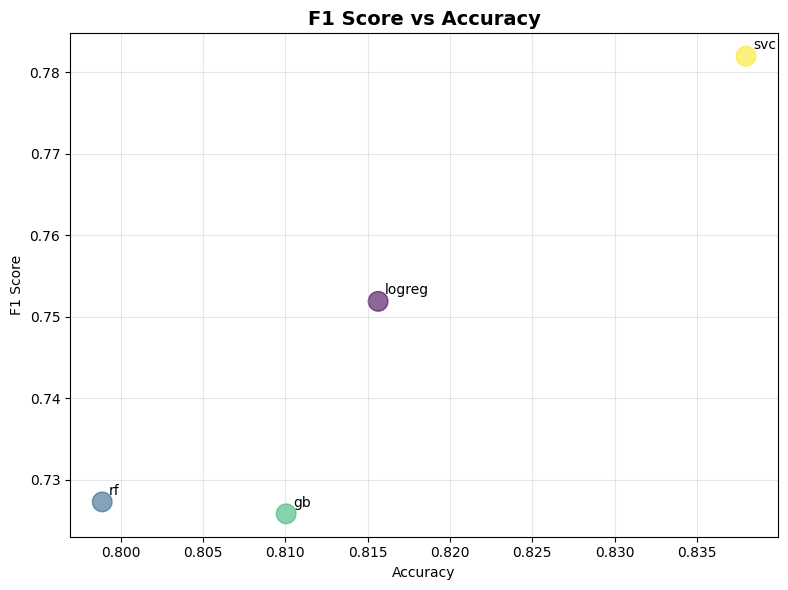

In [6]:
# Plot 4: Scatter plot - F1 vs Accuracy (để thấy trade-off)
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    results_df["accuracy"],
    results_df["f1"],
    s=200,
    alpha=0.6,
    c=range(len(results_df)),
    cmap="viridis",
)
for idx, row in results_df.iterrows():
    ax.annotate(
        row["model"],
        (row["accuracy"], row["f1"]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )
ax.set_xlabel("Accuracy")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs Accuracy", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


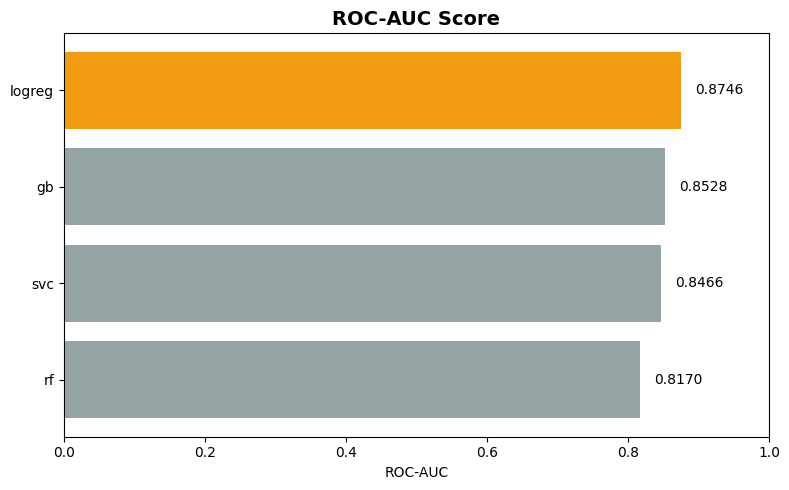

In [7]:
# Plot 5: ROC-AUC comparison
fig, ax = plt.subplots(figsize=(8, 5))
results_sorted_auc = results_df.sort_values("roc_auc", ascending=True)
colors_auc = [
    "#f39c12" if v == results_df["roc_auc"].max() else "#95a5a6"
    for v in results_sorted_auc["roc_auc"]
]
ax.barh(results_sorted_auc["model"], results_sorted_auc["roc_auc"], color=colors_auc)
ax.set_title("ROC-AUC Score", fontsize=14, fontweight="bold")
ax.set_xlabel("ROC-AUC")
ax.set_xlim(0, 1)
for i, v in enumerate(results_sorted_auc["roc_auc"]):
    ax.text(v + 0.02, i, f"{v:.4f}", va="center")
plt.tight_layout()
plt.show()


In [8]:
# Export kết quả để dùng sau
export_path = "models_comparison_results.csv"
summary_export = results_df[["model", "accuracy", "f1", "roc_auc", "runtime_s"]].copy()
summary_export.to_csv(export_path, index=False)
print(f"✓ Kết quả so sánh đã lưu vào: {export_path}")


✓ Kết quả so sánh đã lưu vào: models_comparison_results.csv


## Kết luận

- ✓ Đọc trực tiếp từ `training_log.csv` (không tính toán lại).
- ✓ Vẽ 5 biểu đồ: metrics so sánh, F1 ranking, training time, F1 vs Accuracy, ROC-AUC.
- ✓ Export kết quả vào `models_comparison_results.csv` để dùng sau.

**Best model:** SVC với F1=0.7820 và ROC-AUC=0.8466
